In [15]:
# Source: https://www.youtube.com/watch?v=o1ZHIocdTEk

In [16]:
import numpy as np 
import pandas as pd

# matplotlib libraries

import matplotlib.pyplot as plt
# changed this to just use mplsoccer's pitch module
# from pitch import Pitch ##a helper function to quickly give us a pitch
import matplotlib.patheffects as pe 
from matplotlib.legend_handler import HandlerLine2D
from matplotlib.patches import FancyArrowPatch

from mplsoccer.pitch import VerticalPitch
from adjustText import adjust_text

from statsbombpy import sb

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.sans-serif'] = 'Palatino Linotype'

In [17]:
sb.competitions().head(5)

sb.matches(competition_id=16, season_id=2)

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,18244,2017-06-03,20:45:00.000,Europe - Champions League,2016/2017,Juventus,Real Madrid,1,4,available,...,2021-06-13T16:17:31.694,7,Final,Principality Stadium,Felix Brych,Massimiliano Allegri,Zinédine Zidane,1.0.3,None,None


In [18]:
MATCH_ID = 18244
events = sb.events(MATCH_ID)
#events.columns

In [19]:
all_events_df = events[['location', 'pass_end_location', 'team', 'player', 'timestamp']].dropna()
rma_df = all_events_df.loc[all_events_df['team']=='Real Madrid'].reset_index(drop=True)

rma_df

juv_df = all_events_df.loc[all_events_df['team']=='Juventus'].reset_index(drop=True)


In [20]:
import pandas as pd

start_df = pd.DataFrame(rma_df['location'].to_list(), columns=['start_x','start_y']).reset_index(drop=True)
rma_all = rma_df.join(start_df)

# rma_all

end_df = pd.DataFrame(rma_df['pass_end_location'].to_list(), columns=['end_x','end_y']).reset_index(drop=True)

rma_all = rma_all.join(end_df)

rma_all

,location,pass_end_location,team,player,timestamp,start_x,start_y,end_x,end_y
0,"[29.0, 73.0]","[32.0, 74.0]",Real Madrid,Daniel Carvajal Ramos,00:00:20.152,29.0,73.0,32.0,74.0
1,"[36.0, 75.0]","[57.0, 75.0]",Real Madrid,Luka Modrić,00:00:21.002,36.0,75.0,57.0,75.0
2,"[15.0, 54.0]","[21.0, 62.0]",Real Madrid,Toni Kroos,00:00:53.755,15.0,54.0,21.0,62.0
3,"[27.0, 56.0]","[41.0, 63.0]",Real Madrid,Raphaël Varane,00:01:20.359,27.0,56.0,41.0,63.0
4,"[43.0, 64.0]","[92.0, 40.0]",Real Madrid,Luka Modrić,00:01:23.505,43.0,64.0,92.0,40.0
...,...,...,...,...,...,...,...,...,...
554,"[78.0, 78.0]","[66.0, 76.0]",Real Madrid,Marco Asensio Willemsen,00:47:49.162,78.0,78.0,66.0,76.0
555,"[68.0, 76.0]","[65.0, 5.0]",Real Madrid,Daniel Carvajal Ramos,00:47:51.364,68.0,76.0,65.0,5.0
556,"[69.0, 15.0]","[57.0, 26.0]",Real Madrid,Gareth Frank Bale,00:48:00.574,69.0,15.0,57.0,26.0
557,"[55.0, 27.0]","[64.0, 36.0]",Real Madrid,Sergio Ramos García,00:48:02.715,55.0,27.0,64.0,36.0


Create Field & Plot All Passes

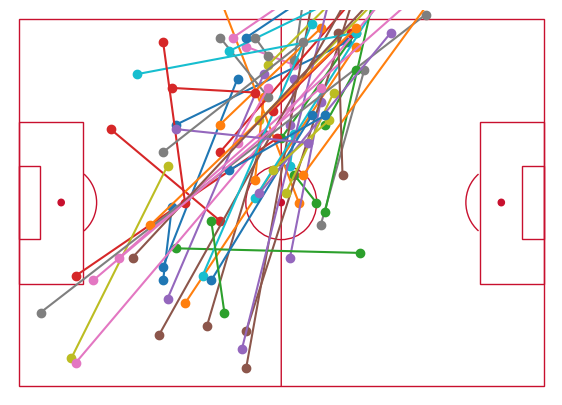

In [21]:
from todofcpy.visualization.graph import Field

field = Field()
pit = field.create_field(grass='#FFFFFF', lines='#C8102E')

rma_all = rma_all[rma_all['player'] == 'Luka Modrić']
l = plt.plot((rma_all['start_x'], rma_all['start_y']), (rma_all['end_x'], rma_all['end_y']), marker='o')

# plt.savefig("Pass.pdf")